  # Pittsburgh's Best Neighborhood for...

 ![](https://media1.giphy.com/media/FP56vNcwOVyvu/giphy.gif?cid=ecf05e47dr8w99wzl2bnml4dozgdojkfdatkwu4cop5348kq&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 ![](https://media1.giphy.com/media/FP56vNcwOVyvu/giphy.gif?cid=ecf05e47dr8w99wzl2bnml4dozgdojkfdatkwu4cop5348kq&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 ![](https://media1.giphy.com/media/FP56vNcwOVyvu/giphy.gif?cid=ecf05e47dr8w99wzl2bnml4dozgdojkfdatkwu4cop5348kq&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 ![](https://media1.giphy.com/media/FP56vNcwOVyvu/giphy.gif?cid=ecf05e47dr8w99wzl2bnml4dozgdojkfdatkwu4cop5348kq&ep=v1_gifs_search&rid=giphy.gif&ct=g)

---
 
 # ARSON!!!!!!!!
 ![](https://media0.giphy.com/media/bP0y34GHtOzp6/giphy.gif?cid=ecf05e47pf6ae8d77xkbnem8156zwm8zs8hebl02tklmpxsl&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 ![](https://media1.giphy.com/media/T2vDaYr8yRhrpFe6WE/giphy.gif?cid=ecf05e47hajzq3u6nmz6b6e1ufxagu7lpj5m42xp97ydkkra&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 ![](https://media4.giphy.com/media/Lopx9eUi34rbq/giphy.gif?cid=ecf05e475cxwigewvc4savx8kubyeza6zpf5cr6fac7a04m6&ep=v1_gifs_search&rid=giphy.gif&ct=g)
 
  ## In order to further the pyrotechic arts, we decided to try to figure out what neighborhood in Pittsburgh is the best to commit arson in. Arson may seem like a spontaneous act, but there is plenty to consider to get the most bang for your buck!
 
 ![](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExanp5d3NsbHYzOHd2bDJkYnA3cmlpbGJ6bWcxeml0ZHJ1bXNpcXBpOSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l2JdWQoko8AEhap7G/giphy.gif)
 
 ## We used multiple data sources in order to find the area with the best potential to burn, as well as where you'd be least likely to be caught. Our data sets are Reported Fire Incidents, Arrest Records, and Issued Asbestos Permits.

---

## Asbestos is naturally occurring, flame retardant material that has been used in the construction of buildings. 
## Fortunately for us, its toxic nature has led to it being phased out in many countries.
## Unfortunately for us, the USA is not one of those countries, and permits for its usage are still issued.
## So in order to avoid any harm to us or the fires that we're planning on starting, we need to find the areas with the least asbestos. The best way for us to do so is to track all the permits issued and see where the majority are located. We want to find out the neighborhood with the smallest ratio of permits to its size.


In [54]:
import pandas as pd
import fpsnippets as fp
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

#Create the data fram from the .csv
asb = pd.read_csv("asbestos.csv", sep=",", low_memory=False)
fire = pd.read_csv("fire incidents.csv", sep=",", low_memory=False)
arrest = pd.read_csv("arrests.csv", sep=",", low_memory=False)
nbhInfo = pd.read_csv("neighborhoods.csv", sep=",", low_memory=False)

#Add a column for the neighborhoods to be placed
asb['neighborhood'] = ''
arrest['neighborhood'] = ''

#Setting up the dictionaries for the amount of occurances in the asbestos.csv and the square milage of each neighborhood
asbCount = dict()
arrestCount = dict()
fireCount = dict()
squareMiles = dict()

# gets neighborhoods in column of 'fire incidents'
neighborhoods_in_fire = fire['neighborhood'].unique()

# Filter rows in 'nbhInfo' where the hood is not in 'neighborhoods_in_fire'
nbhInfo_filtered = nbhInfo[nbhInfo['hood'].isin(neighborhoods_in_fire)]

# Here I am counting the fire incidents per neighborhood
fire_counts_per_neighborhood = fire['neighborhood'].value_counts().to_dict()

# updating the fire count dictionary
fireCount.update(fire_counts_per_neighborhood)

#Manually combined duplicate neighborhood under two names.
fireCount['Mt. Oliver'] += fireCount['Mount Oliver Borough']
del fireCount['Mount Oliver Borough']

#Iterate through Asbestos dataframe and add the neighborhood based on coors, then zip if no coors
for index, row in asb.iterrows():
    outGeo = fp.geo_to_neighborhood(row['latitude'], row['longitude'])
    outZip = fp.zip_to_neighborhoods(row['z_code'])
    final = ""
    if outGeo != "None":
        final = outGeo
    elif outZip!= "None":
        final = outZip
    else:
        final = "None"
    
    asb.at[index, "neighborhood"] = final
    
    #Manages a dictionary that I use later for my data frame
    if not(final in asbCount):
        asbCount[final] = int(1)
    else:
        asbCount[final] += int(1)

#Manually added cities from other datasets that were not in Asbestos
asbCount["Chartiers City"] = 0
asbCount["Arlington Heights"] = 0
asbCount["Glen Hazel"] = 0
        
#Iterate through the Arrests dataframe and add the neighborhood based on coors
for index, row in arrest.iterrows():
    outGeo = fp.geo_to_neighborhood(row['Y'], row['X'])
    final = ""
    if outGeo != "None":
        final = outGeo
    else:
        final = "None"
    
    arrest.at[index, "neighborhood"] = final
    
    #Manages a dictionary that I use later for my data frame
    if not(final in arrestCount):
        arrestCount[final] = int(1)
    else:
        arrestCount[final] += int(1)
        
#Removes data points with no location data
del asbCount[None]
del arrestCount[None]

#This pulls the square mile information for the various neighborhoods and puts them in a dictionary
for index, row in nbhInfo.iterrows():
        squareMiles[row['hood']] = row['sqmiles']

#This takes a while to compile, so I have this message for the sake of my sanity
print("Data imported!")

Data imported!


In [ ]:
#This is for adjusting font size. Before I found this, the neighborhoods were unreadable
plt.rcParams.update({'font.size': 50})

#The final dataframe that I create from all the other previous dataframe and dictionaries
occurAsb = pd.Series(asbCount).sort_values(ascending=False).to_frame()

#Assigns the column name for the 1st set of data, then adds columns for the other data that will be added.
occurAsb.columns =['Permit Amount']
occurAsb['Square Miles'] = ''
occurAsb['Ratio'] = ''
occurAsb['Rating'] = ''
occurAsb['hood'] = ''

for index, row in occurAsb.iterrows():
    #I determine the ratio by (amount of permits / square miles)
    ratio = row['Permit Amount']/float(squareMiles[index])
    
    #I made a general tier system for the neighborhoods based off the calculated ratio
    if ratio>100:
        rate = 1
    elif (ratio>50):
        rate = 2
    elif (ratio>10):
        rate = 3
    else:
        rate = 4
    
    #This just fills in the rest of the data set as it iterates
    occurAsb.at[index,'Rating'] = rate
    occurAsb.at[index,'Square Miles'] = squareMiles[index]
    occurAsb.at[index,'Ratio'] = ratio
    occurAsb.at[index,'hood'] = index

#I decided to use bar graphs for the time being, I may look into other types later. Figsize determines the dimensions, subplots makes a unique graph for each set of values in the frame.
occurAsb.sort_values(by=['Ratio'], ascending=False).plot.bar(figsize=(100,100), subplots=True)

 ## So as you can see, we ordered our data by the calculated ratio, then assigned each neighborhood a rating based on that.

/opt/tljh/user/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % uvk, UserWarning)


Text(0.5, 1.0, 'Asbestos Density')

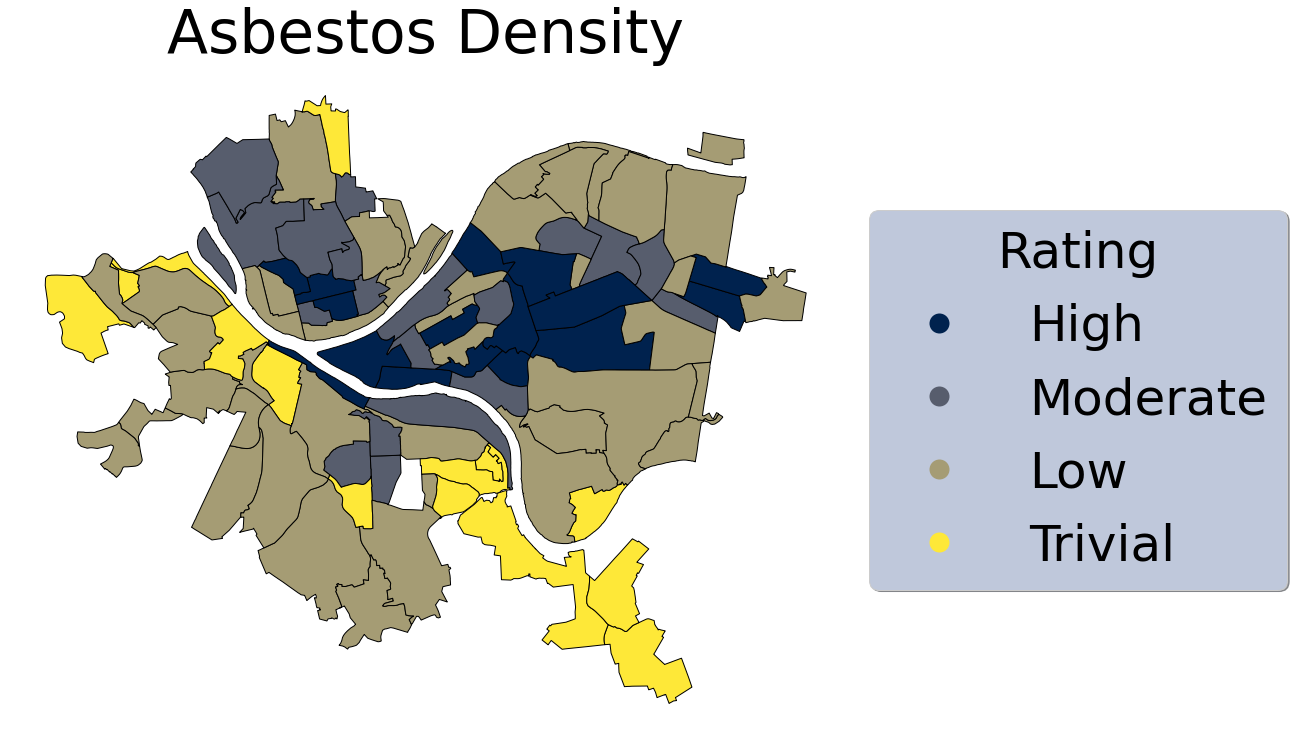

In [47]:
shapeMap = gp.read_file("neighborhoodShapes/Neighborhoods_.dbf")

finalAsbMap = shapeMap.merge(occurAsb, on='hood')

fig,ax = plt.subplots(figsize=(15,15))
finalAsbMap.plot(ax=ax, column='Rating', cmap = 'cividis', edgecolor='black', legend=True, scheme='natural_breaks', legend_kwds={"labels": ["High", "Moderate", "Low", "Trivial"], "title": "Rating", "loc": "center left", "bbox_to_anchor": (1, 0.5), "shadow": "True", "facecolor": "#bfc8db", "markerscale": 2.0})

ax.axis("off")
ax.set_title("Asbestos Density", fontdict={})

 ## You can see the light yellow zones are our best bets for avoiding asbestos
 
 ---
 
 ## Our next data set is about the arrests in each area. This dataset contains information reported by the Pittsburgh Police. Ideally we don't want to get arrested, so we're looking for a similar ratio to what we did above for asbestos. The lower the ratio, the better our chances of getting away with it.

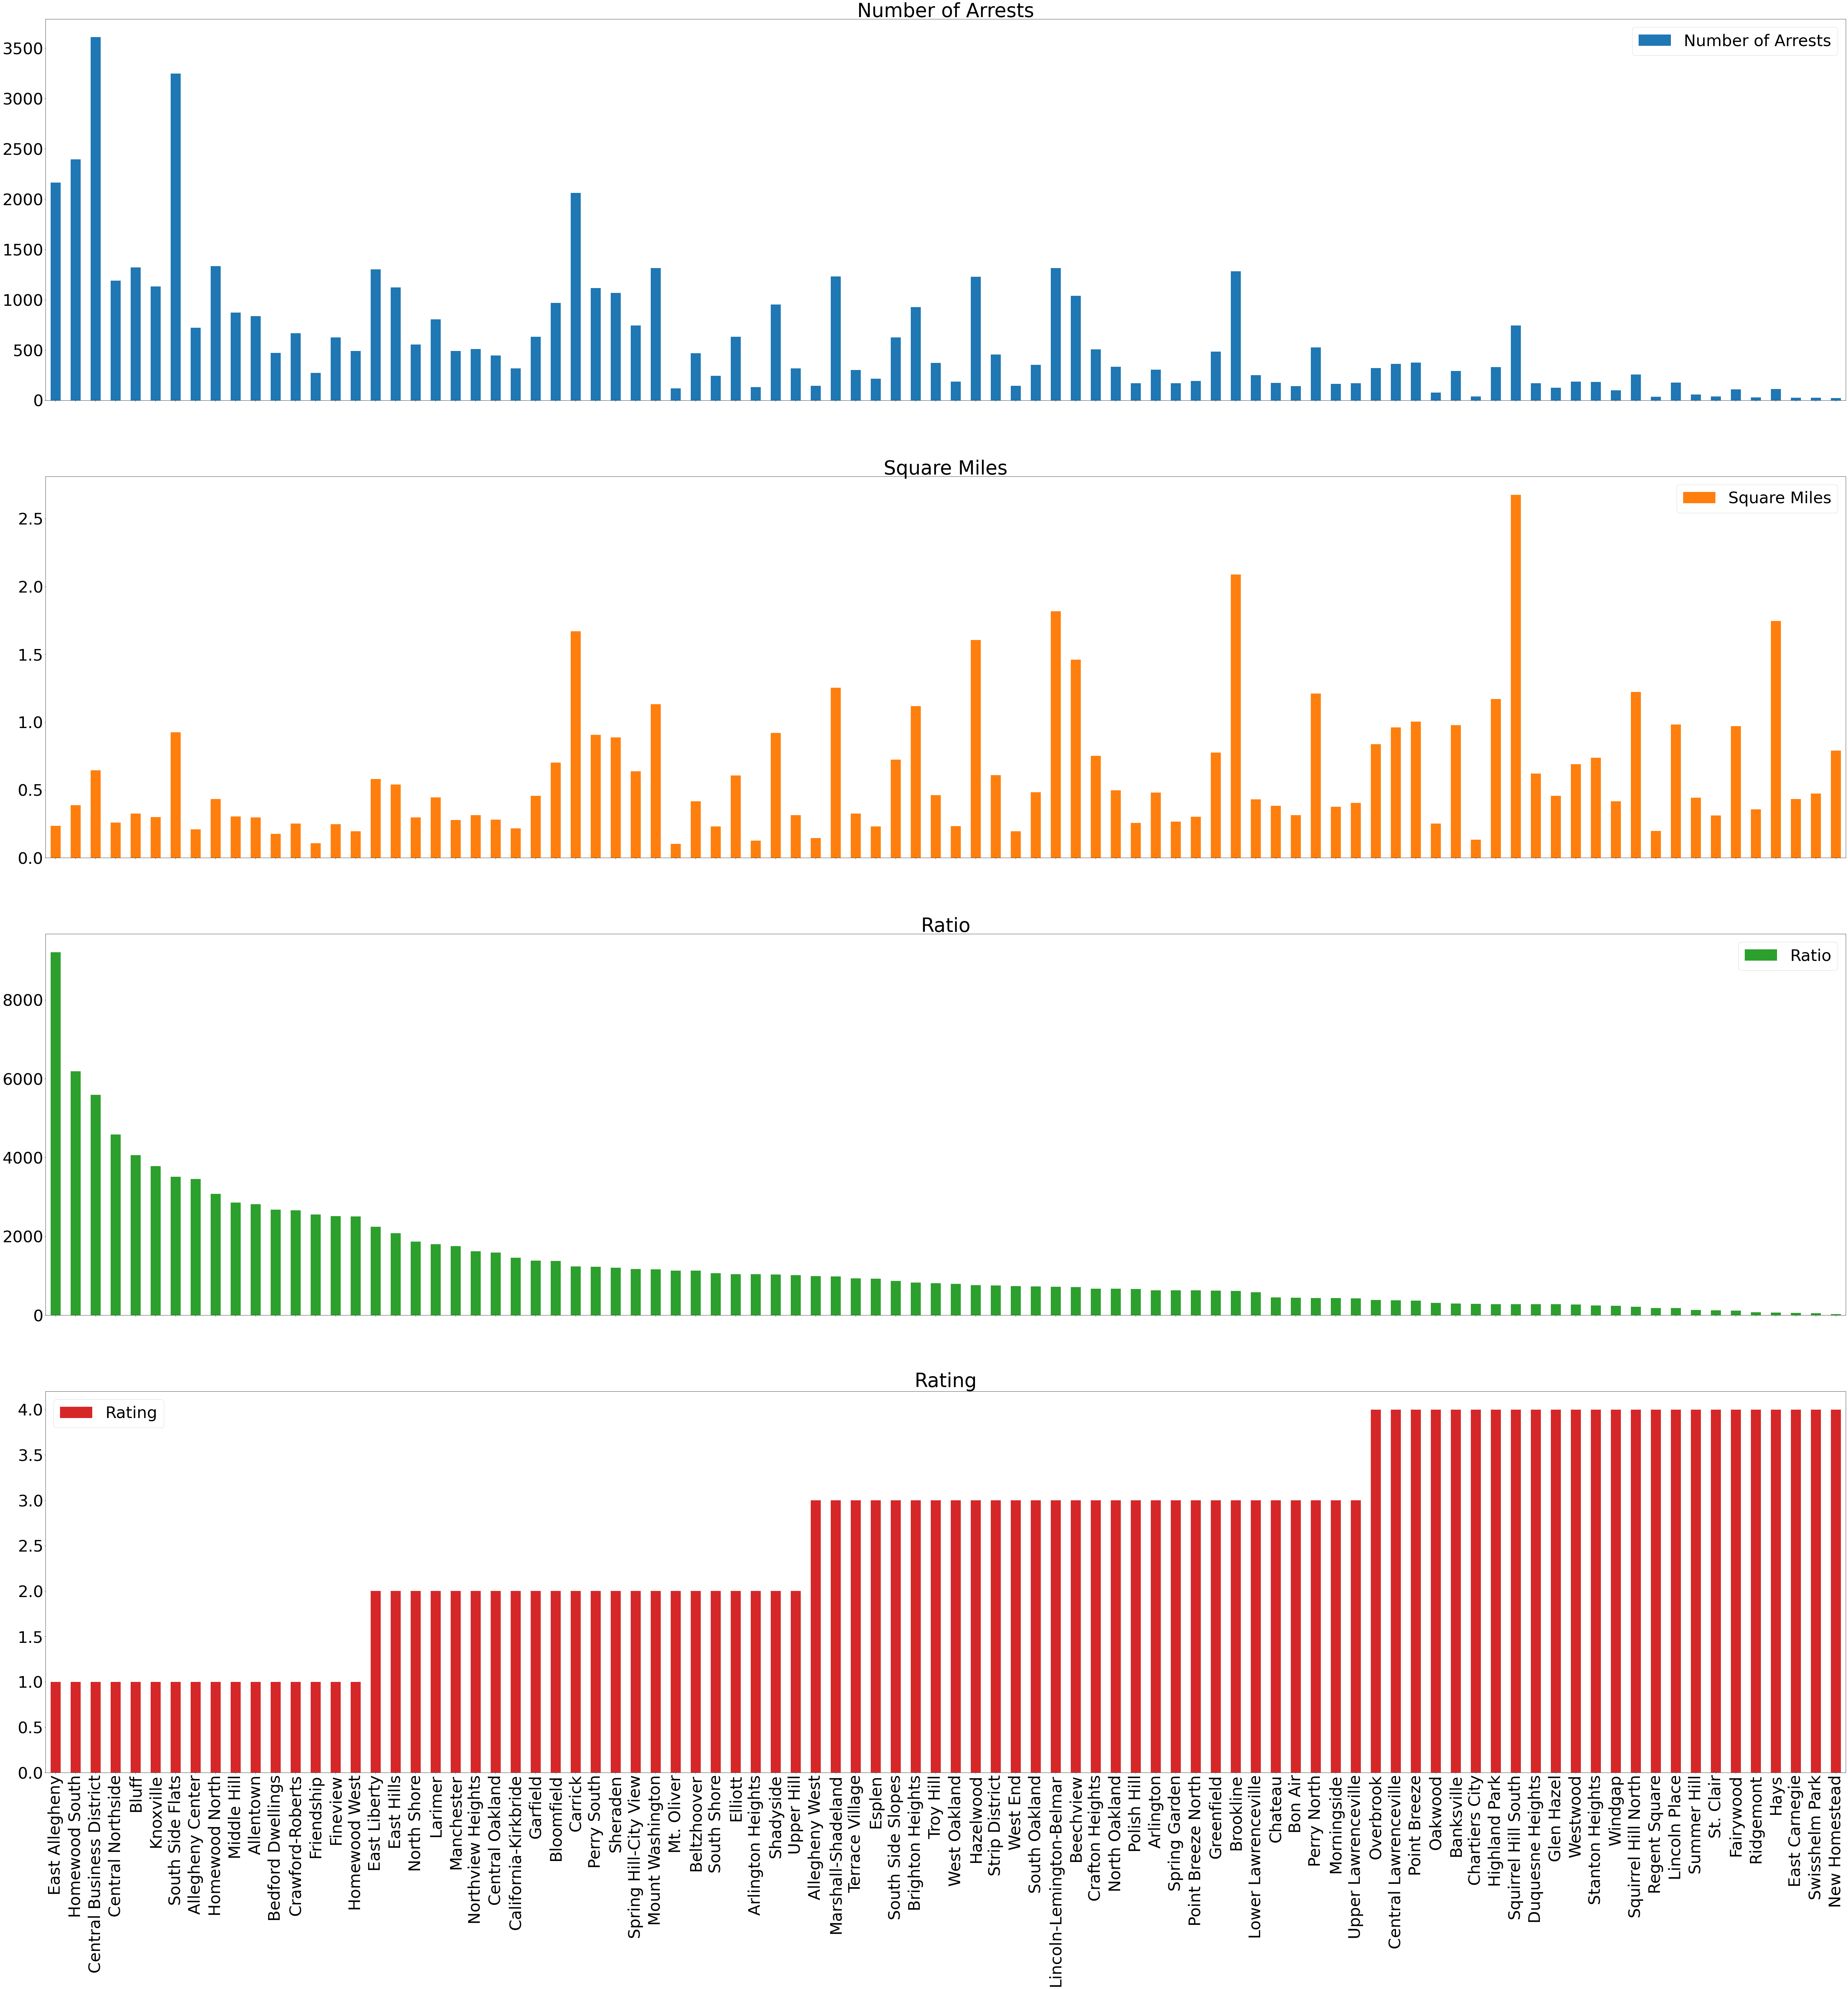

In [48]:
#This is for adjusting font size. Before I found this, the neighborhoods were unreadable
plt.rcParams.update({'font.size': 50})

#The final dataframe that I create from all the other previous dataframe and dictionaries
occurArr = pd.Series(arrestCount).sort_values(ascending=False).to_frame()

#Assigns the column name for the 1st set of data, then adds columns for the other data that will be added.
occurArr.columns =['Number of Arrests']
occurArr['Square Miles'] = ''
occurArr['Ratio'] = ''
occurArr['Rating'] = ''
occurArr['hood'] = ''

#print(occur)

#Neigborhood names to title case for consistency
occurArr.index = occurArr.index.str.title()
squareMiles = {key.title(): value for key, value in squareMiles.items()}

for index, row in occurArr.iterrows():
    # Retrieve the square miles for the neighborhood (case-insensitive)
    square_miles = squareMiles.get(index, 0.0)
    
    # Determine the ratio by (amount of fire incidents / square miles)
    if square_miles != 0.0:
        ratio = row['Number of Arrests'] / float(square_miles)
    else:
        # Handle the case where square_miles is zero (set ratio to a default value)
        ratio = 0.0
    #same tier system as others
    if ratio>2250:
        rate = 1
    elif (ratio>1000):
        rate = 2
    elif (ratio>400):
        rate = 3
    else:
        rate = 4
    
    #This just fills in the rest of the data set as it iterates
    occurArr.at[index,'Rating'] = rate
    occurArr.at[index,'Square Miles'] = squareMiles.get(index,0.0)
    occurArr.at[index,'Ratio'] = ratio
    occurArr.at[index,'hood'] = index

#print(occur)
    
#I decided to use bar graphs for the time being, I may look into other types later. Figsize determines the dimensions, subplots makes a unique graph for each set of values in the frame.
occurArr.sort_values(by=['Ratio'], ascending=False).plot.bar(figsize=(100,100), subplots=True)
plt.show()

 ## This is mainly more important as it gives us places to avoid. Most of the neighborhoods on the lower end are pretty comparable.

/opt/tljh/user/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % uvk, UserWarning)


Text(0.5, 1.0, 'Arrest Density')

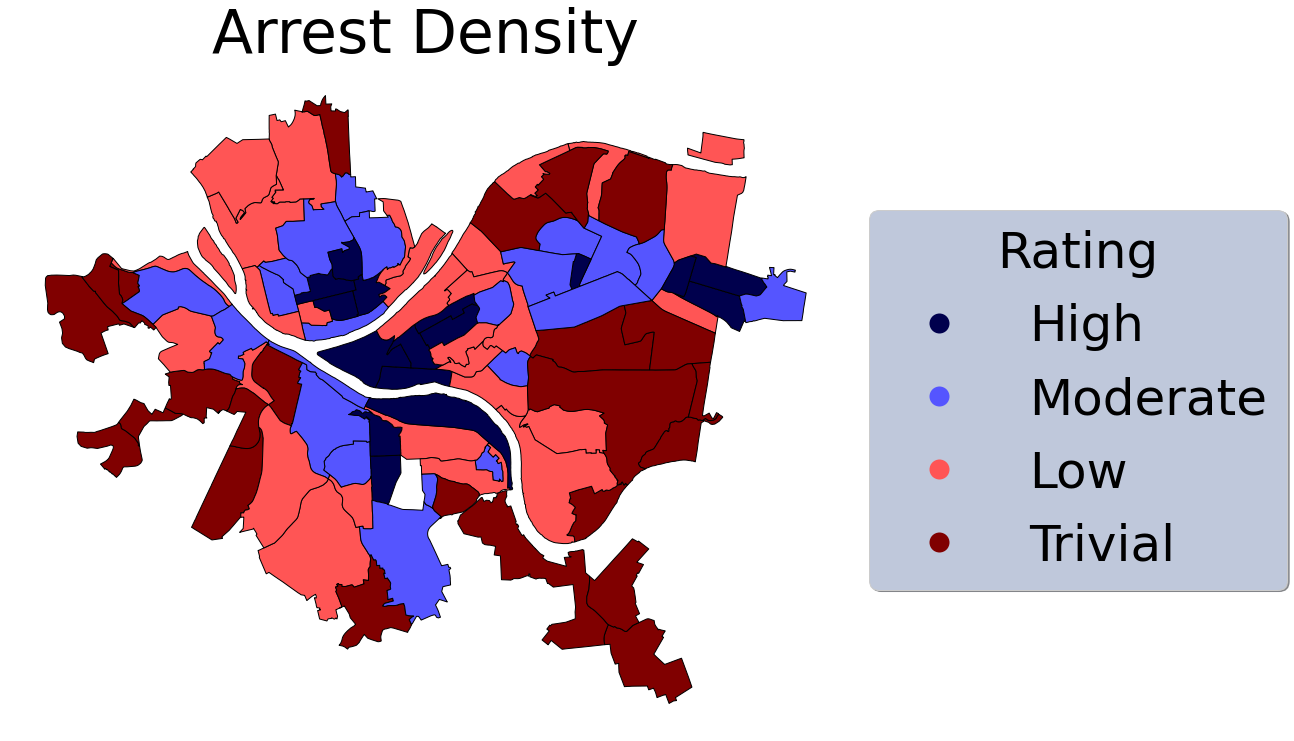

In [13]:
shapeMap = gp.read_file("neighborhoodShapes/Neighborhoods_.dbf")

finalArrMap = shapeMap.merge(occurArr, on='hood')

fig,ax = plt.subplots(figsize=(15,15))
finalArrMap.plot(ax=ax, column='Rating', cmap = 'seismic', edgecolor='black', legend=True, scheme='natural_breaks', legend_kwds={"labels": ["High", "Moderate", "Low", "Trivial"], "title": "Rating", "loc": "center left", "bbox_to_anchor": (1, 0.5), "shadow": "True", "facecolor": "#bfc8db", "markerscale": 2.0})

ax.axis("off")
ax.set_title("Arrest Density", fontdict={})

 ## You can see a higher amount of arrests, generally as you get closer to the center of the city, so the outskirts seem like good targets. If you want to commit arson and not get arrested, the red areas are your best bet.
 
 ---
 
 ## Our final data set we looked at is the number of reported fire incidents. This was a record of all response calls from the firefighters in the Pittsburgh area. We were a little torn as if we should look for places that have had the most or the fewest incidents. While being pyrotechnic hipsters is trendy, we decided we should look for the areas that combust the most, in order to give us the best chance for a successful burn. Looking for areas with higher fire incidents also makes it less suspicious since we can pass off our arson as just another fire accident.

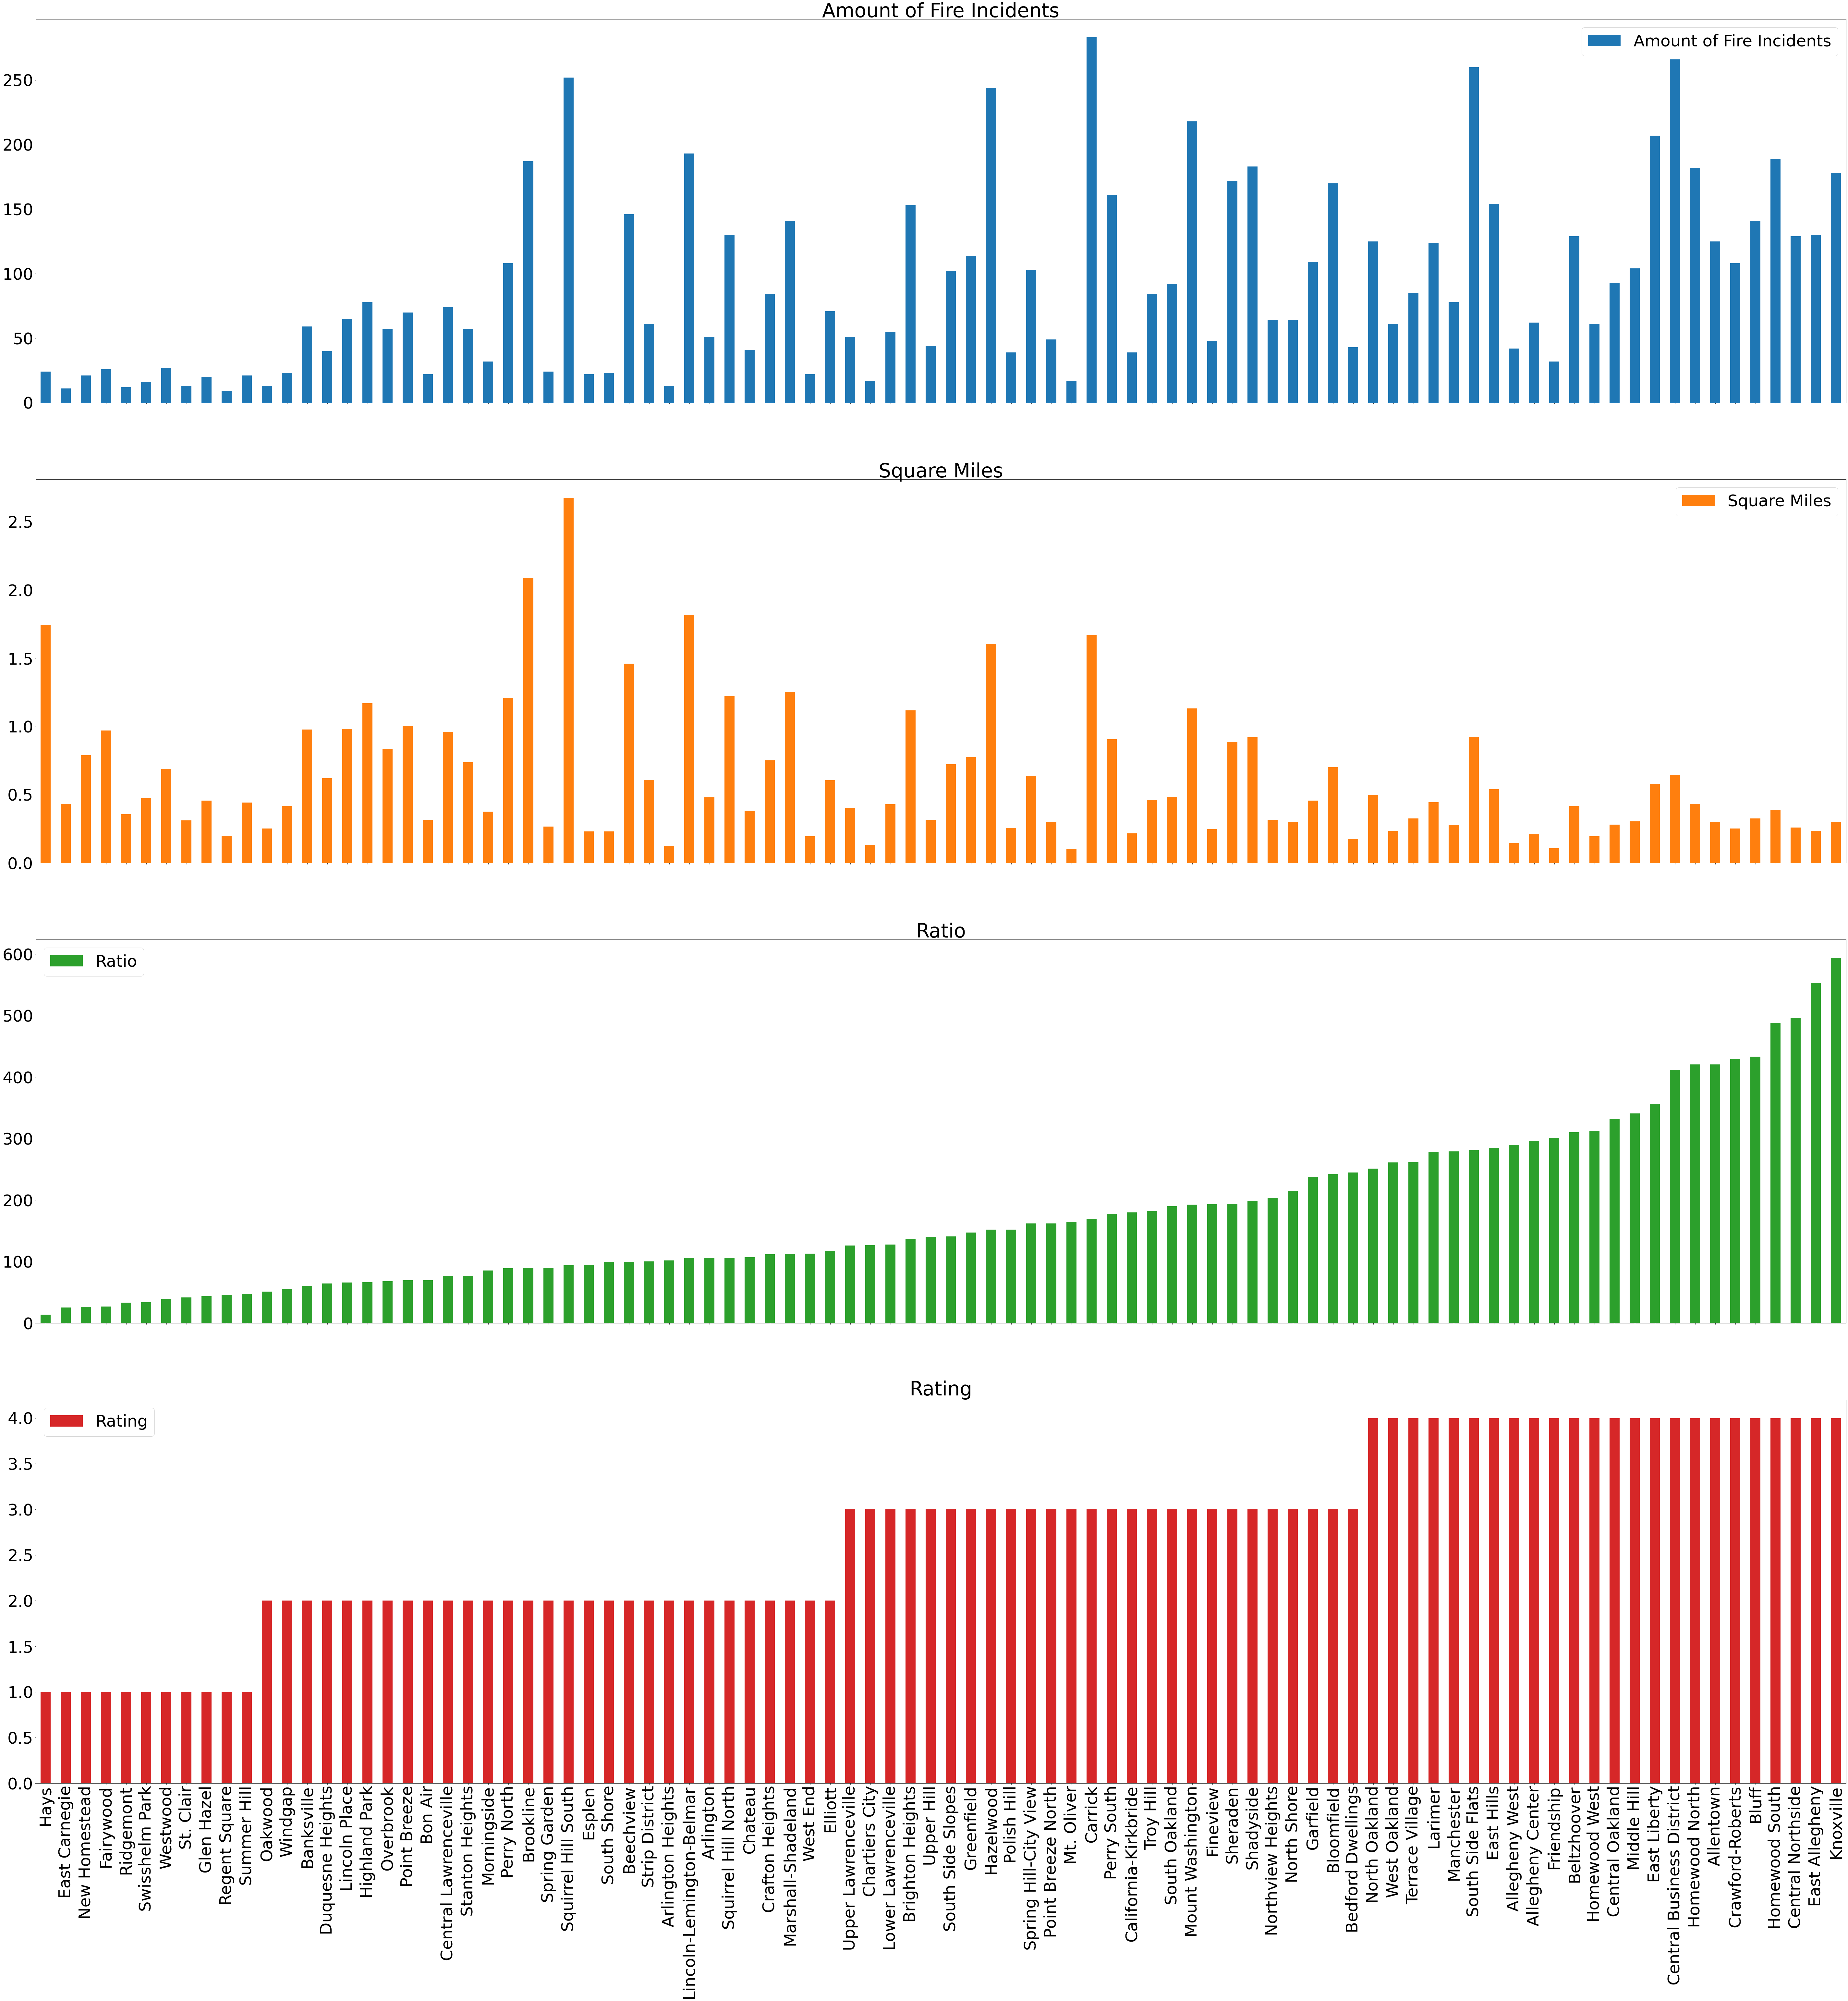

In [49]:
#Adjusting font size like my group member did
plt.rcParams.update({'font.size': 50})

#The final dataframe
incidents = pd.Series(fireCount).sort_values(ascending=False).to_frame()

#Columns for each data
incidents.columns =['Amount of Fire Incidents']
incidents['Square Miles'] = ''
incidents['Ratio'] = ''
incidents['Rating'] = ''
incidents['hood'] = ''

#Neigborhood names to title case for consistency
incidents.index = incidents.index.str.title()
squareMiles = {key.title(): value for key, value in squareMiles.items()}


for index, row in incidents.iterrows():
    # Retrieve the square miles for the neighborhood (case-insensitive)
    square_miles = squareMiles.get(index, 0.0)
    
    # Determine the ratio by (amount of fire incidents / square miles)
    if square_miles != 0.0:
        ratio = row['Amount of Fire Incidents'] / float(square_miles)
    else:
        # Handle the case where square_miles is zero (set ratio to a default value)
        ratio = 0.0
    #same tier system as others
    if ratio<50:
        rate = 1
    elif (ratio<125):
        rate = 2
    elif (ratio<250):
        rate = 3
    else:
        rate = 4
        
    
    #fills the rest of the dataset
    incidents.at[index,'Rating'] = rate
    incidents.at[index,'Square Miles'] = squareMiles.get(index,0.0)
    incidents.at[index,'Ratio'] = ratio
    incidents.at[index,'hood'] = index

#same way data is displayed by groupmates.
incidents.sort_values(by=['Ratio'], ascending=True).plot.bar(figsize=(100,100), subplots=True)
plt.show()


 ## We mainly want to look at those in the top 30% of the Fire Incident to size ratio.

/opt/tljh/user/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/tljh/user/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % uvk, UserWarning)


Text(0.5, 1.0, 'Fire Incident Density')

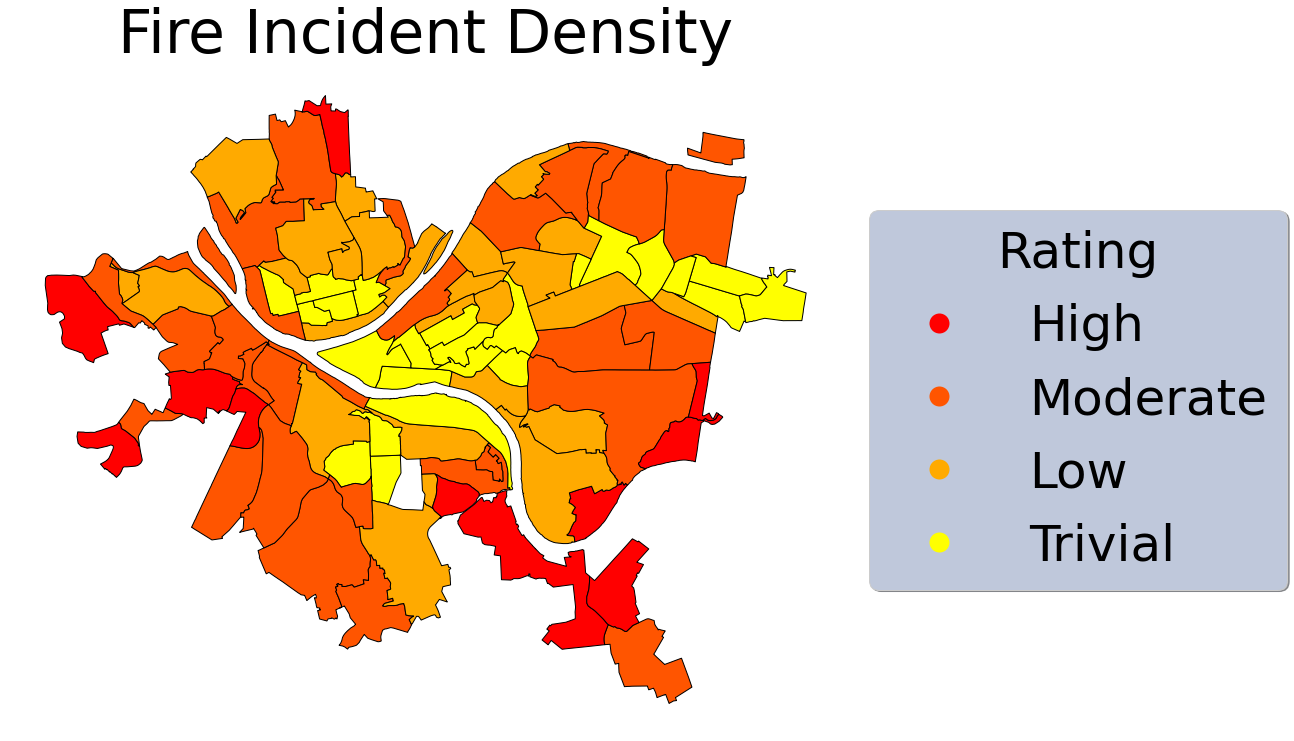

In [50]:
shapeMap = gp.read_file("neighborhoodShapes/Neighborhoods_.dbf")

finalIncMap = shapeMap.merge(incidents, on='hood')

fig,ax = plt.subplots(figsize=(15,15))
finalIncMap.plot(ax=ax, column='Rating', cmap = 'autumn', edgecolor='black', legend=True, scheme='natural_breaks', legend_kwds={"labels": ["High", "Moderate", "Low", "Trivial"], "title": "Rating", "loc": "center left", "bbox_to_anchor": (1, 0.5), "shadow": "True", "facecolor": "#bfc8db", "markerscale": 2.0})

ax.axis("off")
ax.set_title("Fire Incident Density", fontdict={})

## Since we're looking for places with higher accounts of fire incidents we should be looking towards the redder areas. And again we're noticing a trend that the areas on the outskirt of the city are more prone what we are looking for. 
For fire incidents specifically, neighborhoods in the south and west seem to see the most occurences.
---

## So what now? We compiled all of the scores from the three metrics and have gotten a couple stand out candidates.

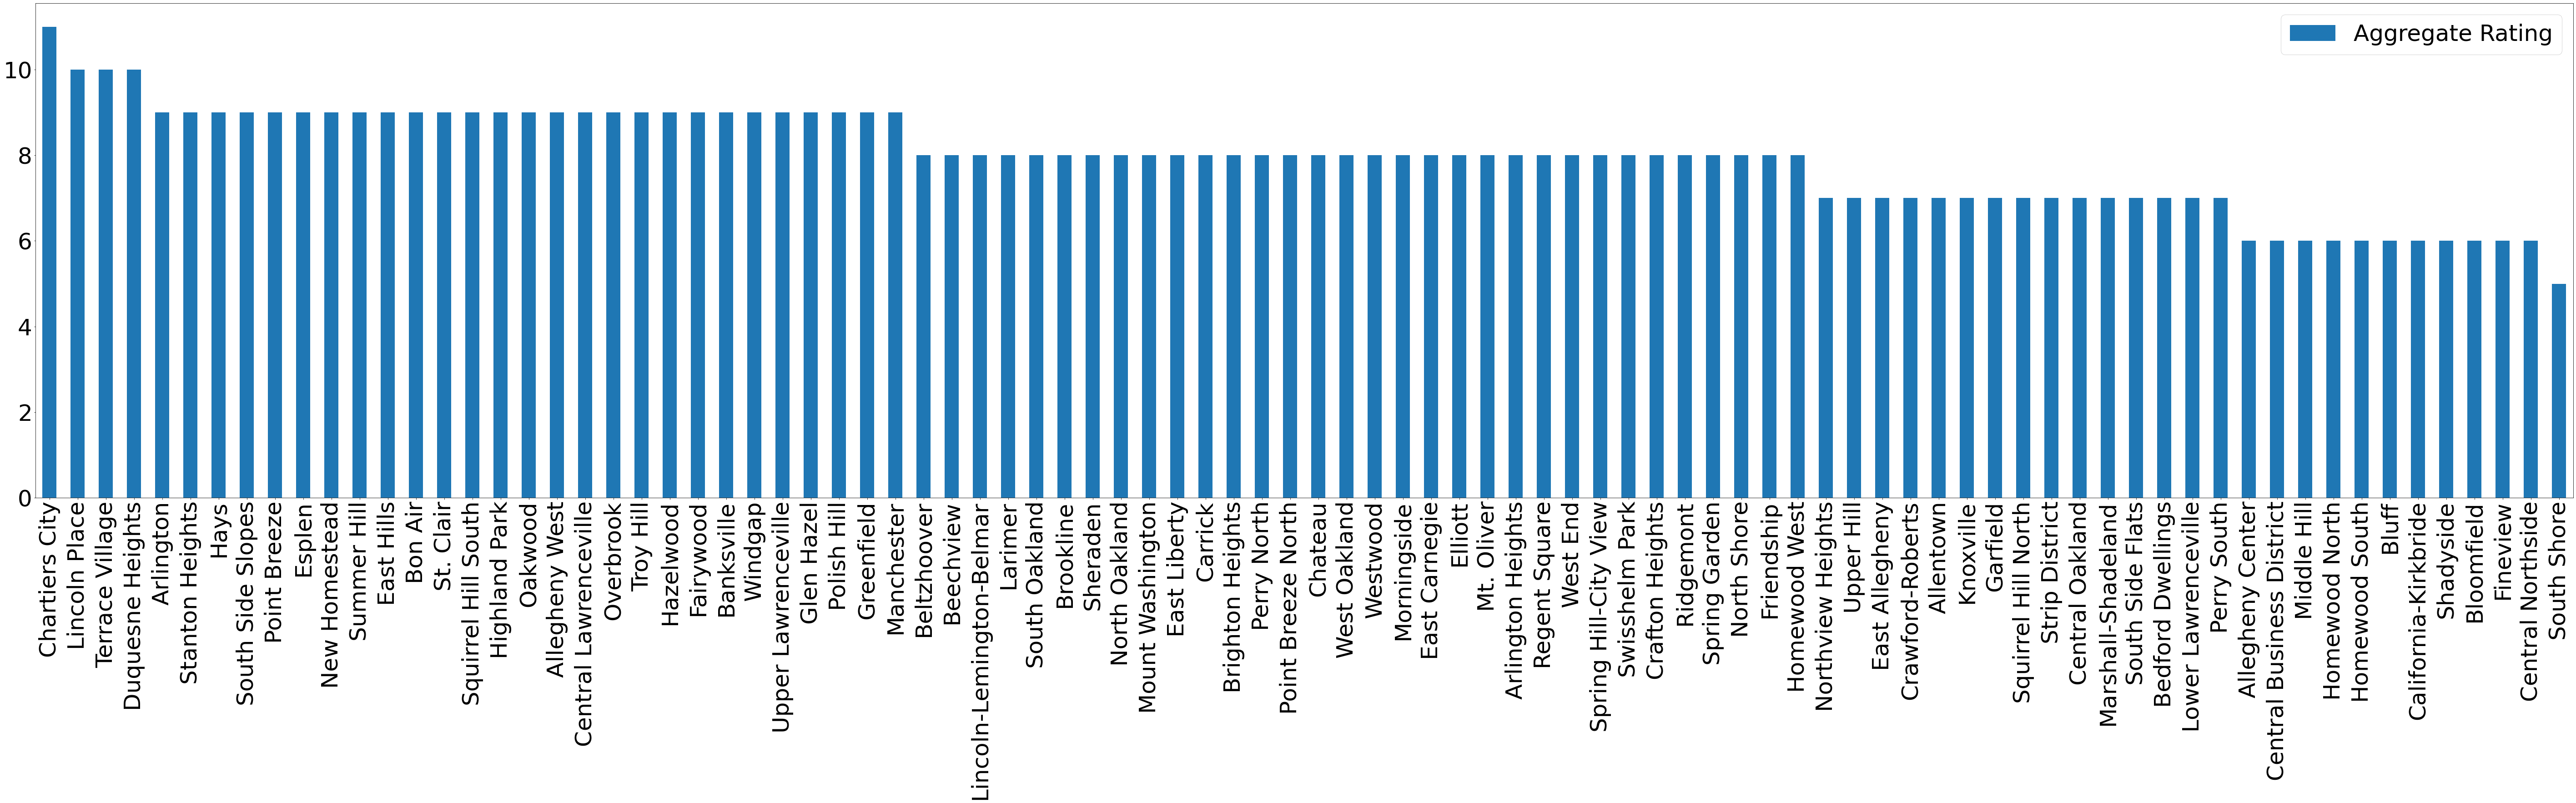

In [51]:
totalRating = dict()

for index, row in occurAsb.iterrows():
    totalRating[index] = occurAsb.at[index,'Rating'] + occurArr.at[index,'Rating'] + incidents.at[index,'Rating']
    
#print(totalRating)

ratingOutput = pd.Series(totalRating).sort_values(ascending=False).to_frame()
ratingOutput.columns = ['Aggregate Rating']
ratingOutput.sort_values(by=['Aggregate Rating'], ascending=False).plot.bar(figsize=(100,20))

 ## Our 1st place goes to Chartiers City, followed by a joint 2nd for Lincoln Place, Terrace Village, and Duquesne Heights. Here is a map of the scores:

Text(0.5, 1.0, 'Final Arson Rating')

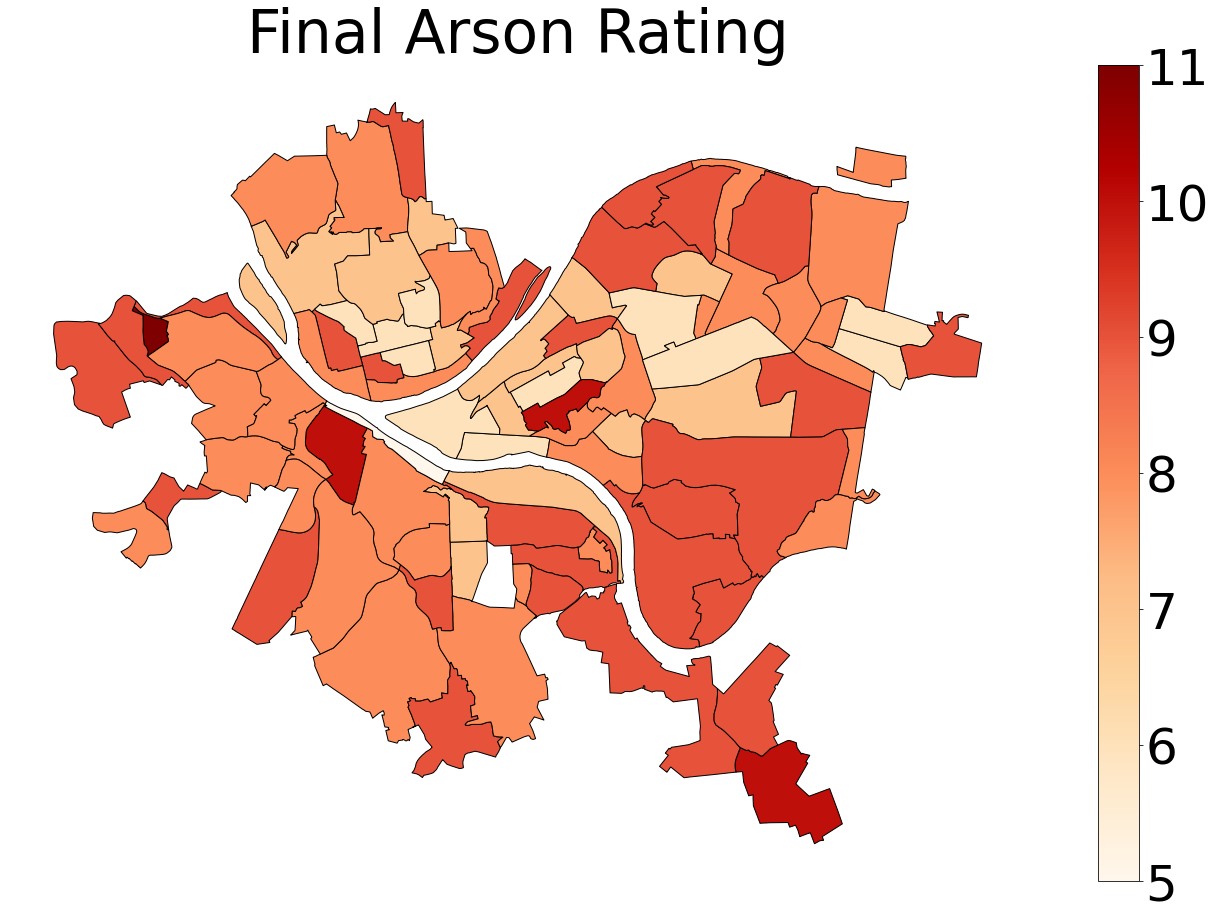

In [52]:
ratingOutput['hood'] = ''

for index, row in ratingOutput.iterrows():
    ratingOutput.at[index,'hood'] = index

shapeMap = gp.read_file("neighborhoodShapes/Neighborhoods_.dbf")

finalArsMap = shapeMap.merge(ratingOutput, on='hood')

fig,ax = plt.subplots(figsize=(25,15))
finalArsMap.plot(ax=ax, column='Aggregate Rating', cmap = 'OrRd', edgecolor='black', legend=True)

ax.axis("off")
ax.set_title("Final Arson Rating", fontdict={})

 # Questions, Comment, Concerns, Anecdotes, Pet Pictures?